In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
import joblib

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.spatial import ConvexHull

from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans


In [3]:
df = pd.read_csv("./data/Diabetes_prediction.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


In [4]:

features = df.columns[:-1]  # Adjust as per your dataset
x = df.loc[:, features].values
y = df.loc[:, 'Diagnosis'].values  # Adjust the column name as per your dataset

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)  # You can adjust the number of components
principalComponents = pca.fit_transform(x_scaled)


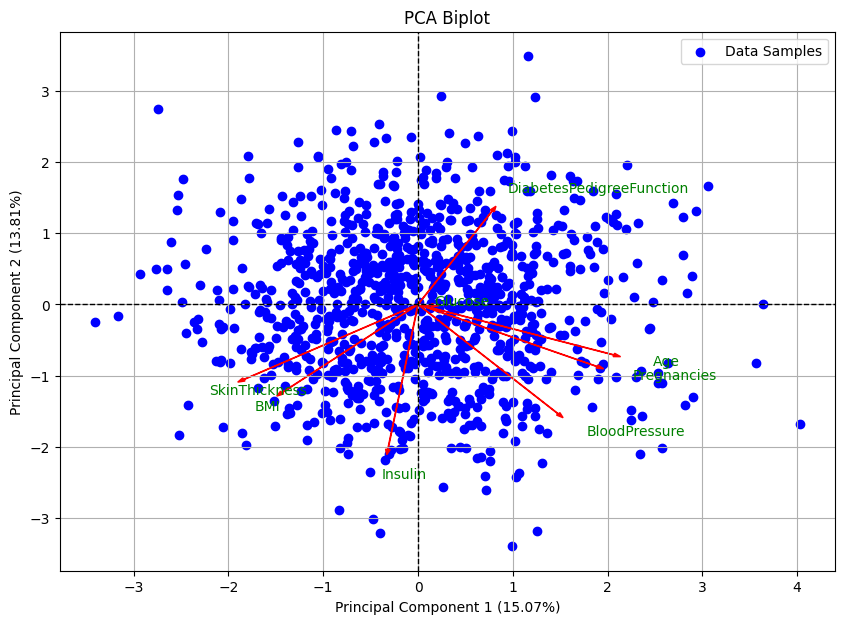

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame from the PCA output
pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Diagnosis'] = y  # Or your target variable

# Plot initialization
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', label='Data Samples')

# Plotting the projection of the original features along the components
for i, feature in enumerate(features):
    plt.arrow(0, 0, pca.components_[0, i] * max(pca_df['PC1']), pca.components_[1, i] * max(pca_df['PC2']),
              color='r', width=0.005, head_width=0.05)
    plt.text(pca.components_[0, i] * max(pca_df['PC1']) * 1.2, pca.components_[1, i] * max(pca_df['PC2']) * 1.2,
             feature, color='g')

plt.xlabel("Principal Component 1 ({}%)".format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel("Principal Component 2 ({}%)".format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.title('PCA Biplot')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--', lw=1)
plt.axvline(x=0, color='k', linestyle='--', lw=1)
plt.legend()
plt.show()


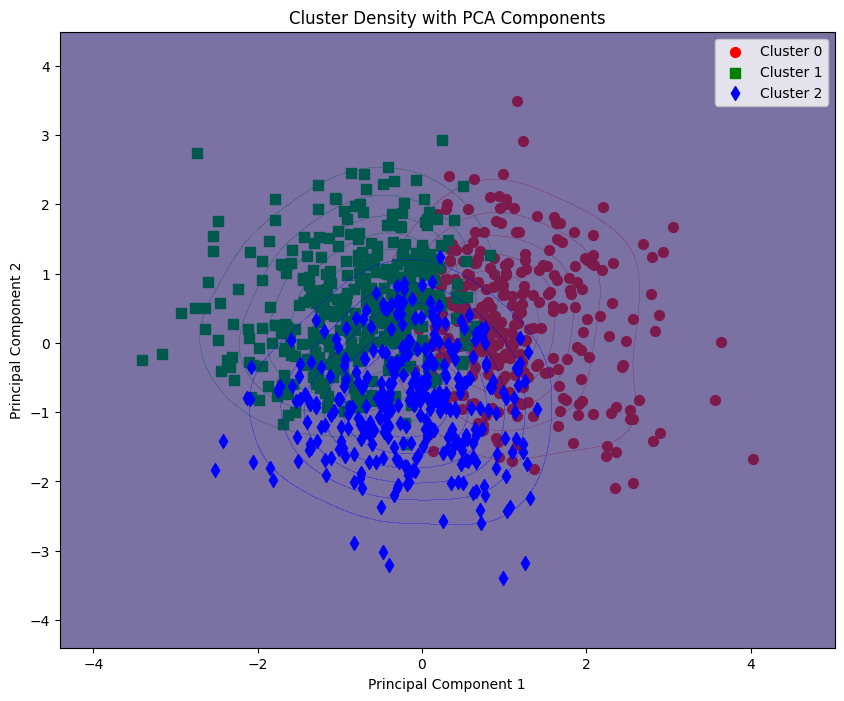

In [60]:
# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(x_scaled)

# Create a grid of points where we will evaluate the KDE
x_min, x_max = principalComponents[:, 0].min() - 1, principalComponents[:, 0].max() + 1
y_min, y_max = principalComponents[:, 1].min() - 1, principalComponents[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_coords = np.c_[xx.ravel(), yy.ravel()]

# Plotting
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue']
markers = ['o', 's', 'd']  # Different markers for each cluster

for i in range(3):
    # Points in the cluster
    cluster_points = principalComponents[clusters == i]
    
    # Fit KDE to cluster data
    kde = KernelDensity(bandwidth=0.5)
    kde.fit(cluster_points)
    
    # Evaluate KDE on grid
    z = np.exp(kde.score_samples(grid_coords)).reshape(xx.shape)
    
    # Contour plot
    plt.contourf(xx, yy, z, levels=np.linspace(z.min(), z.max(), 8), alpha=0.3, colors=[colors[i]])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=50, c=colors[i], marker=markers[i], label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Density with PCA Components')
plt.legend()
plt.show()

In [45]:
pca_df.to_csv('./data/pca_df.csv')
principalComponents

array([[-1.82473412e+00, -4.44595408e-05],
       [ 3.19874369e-01,  7.62131080e-02],
       [ 9.28222790e-02,  5.84914298e-01],
       ...,
       [ 7.08960776e-01,  1.32395717e+00],
       [-2.42557966e+00, -1.40929665e+00],
       [-2.12921949e+00, -7.93485122e-01]])

In [38]:
pca_df
X = pca_df[['PC1', 'PC2']]
X

,PC1,PC2
0,-1.824734,-0.000044
1,0.319874,0.076213
2,0.092822,0.584914
3,0.880765,0.381010
4,-0.247761,-0.235494
...,...,...
995,-2.547187,1.326397
996,-0.707321,0.015458
997,0.708961,1.323957
998,-2.425580,-1.409297


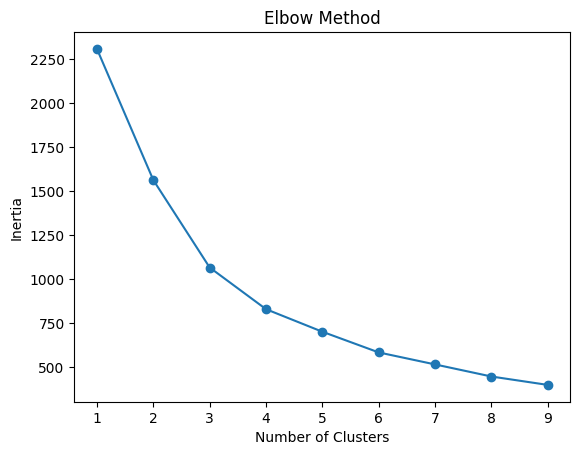

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
range_values = range(1, 10)  # Testing 1 through 9 clusters

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)  # No need for scaled data
    inertia.append(kmeans.inertia_)

plt.plot(range_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [40]:
# Let's assume the elbow plot suggested 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)  # No scaling needed here

# Assign clusters back to our DataFrame
pca_df['cluster'] = kmeans.labels_


(-3.7803319011894376,
 4.397454009417163,
 -3.7438876628375284,
 3.833720426464549)

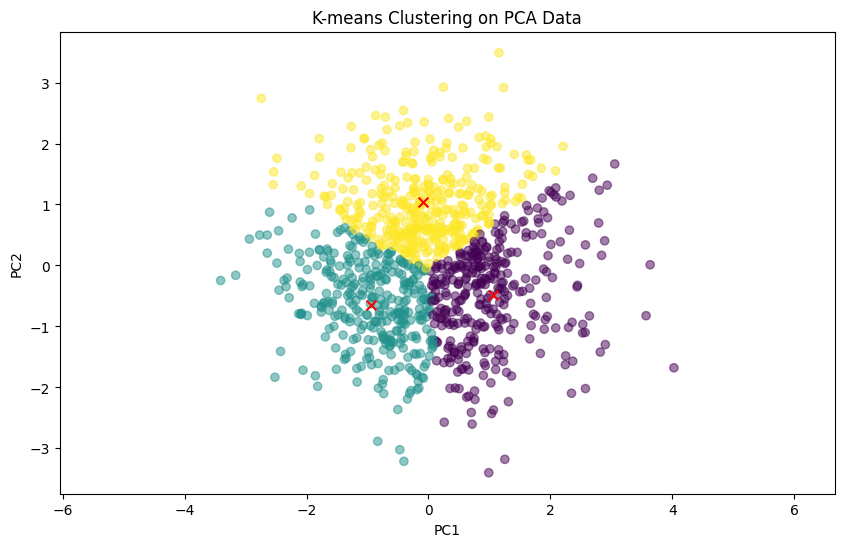

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', marker='o', alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, marker='x')  # Cluster centers
plt.title('K-means Clustering on PCA Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal')